# Übung 4

**Gruppenname:**

*TLJ*

Christian Rene Thelen, Artur Less, Karl Johannes

### 4.1 Regularisierung mit Weight Decay

*Weight Decay* ist eine klassische Regularisierungsmethode, die Ihnen in unterschiedlichen Formen ganz häufig in Machine Learning Projekten begegnen wird. In dieser Übung werden Sie *Weight Decay Regularisierung* für Regression implementieren und testen.

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numpy.polynomial import Polynomial


def get_target_function():
    return Polynomial((1, 2, -1, -2))


def get_data(sigma=0, N=5):
    np.random.seed(3)
    p = Polynomial((1, 2, -1, -2))
    x = np.sort(np.random.random_sample(size=N) * 2 - 1)
    noise = np.random.standard_normal(len(x))
    return x, p(x) + noise * sigma


x, y = get_data(N=6, sigma=.2)

**Ihre Aufgaben**

(1) Nehmen Sie die Folien der Vorlesung zur Hand und schlagen Sie nach, wie lineare Regression mit Weight Decay definiert ist. Konkret: Schlagen Sie nach, wie die Lösung $w_\text{reg}$ der linearen Regression mit Weight Decay aussieht.

$$
    w_\text{reg} =  (Z^TZ+\lambda E)^{-1} Z^Ty
$$

(2) Implementieren Sie eine Funktion `lin_reg_regularized`, die die Features $x$, die Labels $y$ sowie den Regularisierungsparameter $\lambda$ entgegennimmt und den Gewichtsvektor der finalen Hypothese $w_\text{reg}$ zurückgibt. [Dieser Befehl](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html) kann Ihnen bei der Implementierung helfen.

In [10]:
def lin_reg_regularized(Z, y, lam):
    Z_1 = np.concatenate((np.ones((Z.shape[0], 1)), Z), axis=1)
    Z_pseudoinverse = np.linalg.inv(Z_1.T @ Z_1 + lam * np.identity(len(Z_1.T))) @ Z_1.T
    return Z_pseudoinverse @ y

(3) Kopieren Sie Ihre Funktionen `get_final_g` und `phi4` aus Ihren vorherigen Übungen in dieses Jupyter Notebook.

In [11]:
def phi4(X):
    return np.array([X, X**2, X**3, X**4]).T
def phi(X, Q):
    return np.array([X**i for i in range(Q+1)]).T

In [12]:
def get_final_g(x, w):
    p = Polynomial(w)
    return p(x)

(4) Wenden Sie die nichtlineare Feature-Transformation `phi4` an, führen Sie lineare Regression mit Weight Decay aus ($\lambda = 0.1$), und ermitteln Sie $w_\text{reg}$.

In [13]:
w_reg = lin_reg_regularized(phi4(x), y, 0.1)
print("w_reg = {}".format(w_reg))

w_reg = [ 0.89435322  1.09137705 -0.75644752 -0.25685301 -0.46440064]


(5) Visualisieren Sie Ihre finale Hypothese $w_\text{reg}$ (nutzen Sie `get_final_g`) sowie die Target Function (nutzen Sie `get_target_function`) in einem Plot mit unterschiedlichen Farben im Interval $x\in[-1, 1]$. Was fällt Ihnen auf?

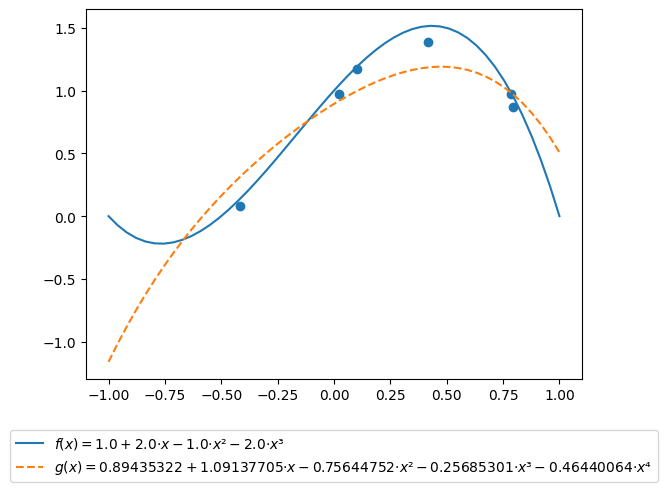

In [14]:
def show_plot(x, y, w, target_function=get_target_function()):
    plt.scatter(x, y)
    plot_a = plt.plot(np.linspace(-1, 1), target_function(np.linspace(-1, 1)), label='$f(x) = {}$'.format(target_function))
    plot_b = plt.plot(np.linspace(-1, 1), get_final_g(np.linspace(-1, 1), w), label='$g(x) = {}$'.format(Polynomial(w)), linestyle='dashed')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), fancybox=True)
    plt.show()

show_plot(x, y, w_reg)

(6) Erstellen Sie denselben Plot wie in Schritt (5), nur fügen Sie dieses Mal noch eine weitere finale Hypothese hinzu, nämlich diejenige, die Sie erhalten, wenn Sie $\lambda=0$ setzen. Das Ergebnis für $\lambda=0$ entspricht der unregularisierten Lösung, also der Lösung, die Sie mit klassischer linearer Regression ohne Weight Decay erhalten. Welche der Hypothesen approximiert die Target Function besser?

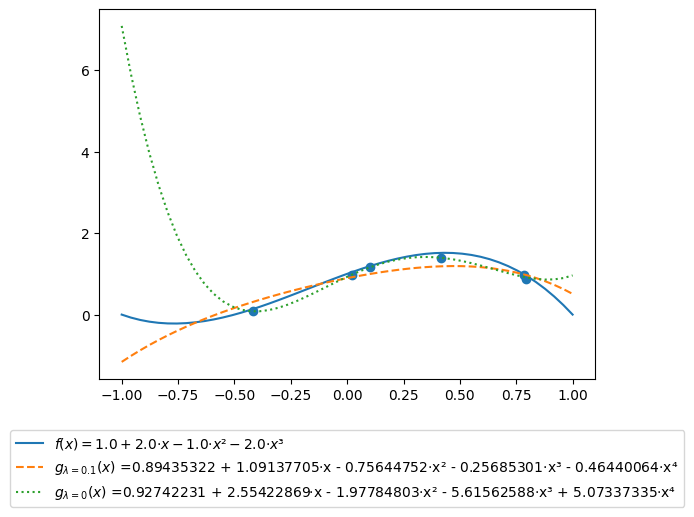

In [15]:
def show_plot(x, y, target_function=get_target_function()):
    plt.scatter(x, y)
    plot_a = plt.plot(np.linspace(-1, 1), target_function(np.linspace(-1, 1)), label='$f(x) = {}$'.format(target_function))
    
    w_1 = lin_reg_regularized(phi4(x), y, 0.1)
    plot_b = plt.plot(np.linspace(-1, 1), get_final_g(np.linspace(-1, 1), w_1), label='$g_{\lambda=0.1}(x)$ ='+str(Polynomial(w_1)), linestyle='dashed')

    w_2 = lin_reg_regularized(phi4(x), y, 0)
    plot_c = plt.plot(np.linspace(-1, 1), get_final_g(np.linspace(-1, 1), w_2), label='$g_{\lambda=0}(x)$ ='+str(Polynomial(w_2)), linestyle='dotted')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), fancybox=True)
    plt.show()

show_plot(x, y)

Die Funktion $g_{\lambda=0.1}(x)$ approximiert die Target Function besser.

(7) Erstellen Sie eine **interaktive Visualisierung** mit einem Slider, mit dem Sie den Wert $\lambda$ einstellen können und die automatisch einen Plot mit der entsprechenden regularisierte Lösung zeigt, die dem Wert $\lambda$ entspricht. 
1. Kommentieren Sie dazu den unteren Code ein und vervollständigen Sie die Funktion `showPlot`. Innerhalb der Funktion steht die Variable `lamb` zur Verfügung, die den durch den Slider eingestellten Wert von $\lambda$ enthält. 
2. Führen Sie in der Funktion `showPlot` regularisierte Regression mit $\lambda$ durch. Visualisieren Sie in der Funktion sowohl die Target Function als auch die regularisierte Lösung. [Stellen Sie sicher](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html), dass der gezeigte y-Achsenabschnitt zwischen -1 und 2 liegt.
3. Führen Sie die entsprechende Code-Zelle aus und schieben den Slider hin und her. Beobachten Sie, wie sich die Kurven verändern. Beschreiben Sie qualitativ, wie sich die regularisierte Lösung ändert, wenn der Wert für $\lambda$ erhöht wird.

In [16]:
# Folgender Code ist für Teilaufgabe (7).
# Bitte kommentieren Sie folgenden Code für Teilaufgabe (7) ein und vervollständigen Sie ihn.
import matplotlib

# funktionierende Kombinationen:
# %matplotlib tk mit matplotlib.use('TkAgg')
# %matplotlib qt mit matplotlib.use('Qt5Agg')
%matplotlib qt

# ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']
matplotlib.use('Qt5Agg', force=True)

from ipywidgets import interact
import ipywidgets as widgets
@interact(lamb=widgets.FloatSlider(min=0,max=0.5,step=0.005,value=0))
def showPlot(lamb):
    plt.close('all')
    # 1. perform regularized linear regression with nonlinear feature transform
    _w = lin_reg_regularized(phi4(x), y, lamb)
    # 2. Visualize final hypothesis
    plt.plot(np.linspace(-1, 1), get_final_g(np.linspace(-1, 1), _w), label='$g_{\lambda='+str(lamb)+'}(x)$ ='+str(Polynomial(_w)), linestyle='dashed')
    # 3. Visualize target function
    target_function = get_target_function()
    plt.plot(np.linspace(-1, 1), target_function(np.linspace(-1, 1)), label='$f(x) = {}$'.format(target_function))
    # 4. Make sure that y-axis shows region between -1 and 2
    plt.ylim(-1, 2)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), fancybox=True)



ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

(8) Schreiben Sie eine Funktion, die den Fehler $E_\text{out}$ im Interval $x\in[-1, 1]$ ermittelt. Sei $y(x)$ der Wert der Target Function an der Stelle $x$ und sei $g_\lambda(x)$ der Wert Ihrer finalen Hypothese an der Stelle $x$ für regularisierte Regression mit dem Regularisierungsparameter $\lambda$. Dann sei der Out-of-Sample Fehler $E_\text{out}(\lambda)$ im Interval $x\in[-1, 1]$ definiert als die mittlere quadratische Abweichung zwischen $g_\lambda$ und $y$ in diesem Interval, 
$$E_\text{out}(\lambda) = \frac{1}{K}\sum_k (g_\lambda(x_k) - y(x_k))^2,$$ wobei wir hier $K=50$ Stützstellen $x_k$ wählen, die das Interval $[-1, 1]$ gleichmäßig in [äquidistanten Abständen abtasten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Hinweis: Sie können sich an Ihrem Code aus Übung 3, Aufgabe 3.2, Schritt 5 bedienen, sollten Sie diese Teilaufgabe bearbeitet haben.

(9) Unterteilen Sie das Intervall $\left[0, 10^{-3}\right]$ äquidistant in 20 Werte für $\lambda$ und ermitteln Sie $E_\text{out}(\lambda)$ für diese Werte. Visualisieren Sie $E_\text{out}(\lambda)$ als Funktion von $\lambda$ in einem Plot. Was fällt Ihnen auf?

**Hinweise**
* Für eine bessere Darstellung des Phänomens [wählen Sie bitte eine logarithmische Darstellung des Wertebereichs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html) von $E_\text{out}$.
* Geben Sie sich zusätzlich die Werte von $E_\text{out}$ aus, die für sehr kleine $\lambda$ Werte erreicht werden.